### 텐서란 데이터를 위한 컨테이너임. 거의 수치형 데이터를 다루므로 숫자를 위한 컨테이너라 할 수 있다.

하나의 숫자만 담고 있는 텐서 = 스칼라(scala)
ndim 속성을 사용하면 넘파이 배열의 축 갯수 확인 가능 -> 텐서의 축 갯수 = 0,랭크=0이라고 함

In [1]:
import numpy as np
x = np.array(12)
print(x, "x의 랭크 : " ,x.ndim)

12 x의 랭크 :  0


숫자의 배열을 벡터락 하며 1D텐서라고 부름, 하나의 축(axis)를 가짐
### 5개의 벡터 -> 5차원 벡터  != 5D텐서! 텐서는 축(랭크)의 갯수에 따라 늘어나는 것. ndim = 랭크 수를 표현

In [2]:
x = np.array([12,3,6,14,7])# 벡터(1D 텐서)
x

array([12,  3,  6, 14,  7])

In [3]:
x.ndim

1

### 행렬(2D 텐서)
2개의 축(행,렬)

In [4]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]
             ])
print(x , "Rank : " ,x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] Rank :  2


### 3D 텐서와 고차원 텐서 

In [5]:
x = np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])
x.ndim

3

### 핵심 속성

#### - 축의 개수(랭크) : 3D 텐서는 3개의 축, 행렬은 2개의 축, ndim속성에 저장되어 있음
#### - 크기(shape) : (3,5) 행렬의 크기지만 축이 3D텐서이므로 (3,3,5)의 텐서크기를 가짐
#### - 데이터 타입 : float32,unit8,float64 등이 있고 드물게 char사용, 연속된 메모리에 저장되기 때문에 가변길이 문자열 지원하지 않음

In [6]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

Using TensorFlow backend.


In [7]:
train_images.ndim

3

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images.dtype

dtype('uint8')

### 8bit 정수형 3D텐서, 28x28 크기의 정수 행렬 6만개가 있는 배열임, 행렬의 각 원소는 0~255값을 가짐

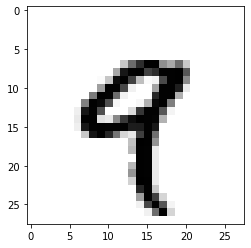

In [13]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 넘파이로 텐서 조작하기

In [14]:
my_slice = train_images[10:100] # 11번째에서 101번째 까지(101 미포함)
# train_images[10:100,: , :]
# train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

###  배치 데이터
모든 데이터 텐서의 첫 번째 축(0번째) = 샘플 축
다음은 크기가 128인 배치

batch = train_images[:128]
batch1 = train_images[128:256]
batch2 = train_images[128*n : 128*(n+1)]

### 텐서의 실제 사례

#### - 벡터 데이터 : (samples, features) 크기의 2D 텐서
#### - 시계열 데이터 or 시퀀스(sequence) 데이터 : (samples,timesteps,features) 크기의 3D텐서
#### - 이미지 : (samples, height, width, channels) or (samples, channels, height, width) 크기의 4D텐서
#### - 동영상 : (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 크기의 5D텐서

### 벡터 데이터
 - 샘플 축, 특성 축으로 구성(2D텐서)
 
 ex) 나이,우편 번호, 소득으로 구성된 인구 10만명의 통계 데이터 = (100000,3) 크기의 텐서에 저장
 
 ex) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터(총 2만개로 구성된 사전). 500개의 문서로 이루어진 데이터 셋=(500,20000)크기의 텐서

#### 시계열 Or 시퀀스 데이터
- 데이터에서 시간이 중요할 때 시간 축을 포함하여 3D텐서 저장

 ex) 주식 가격 데이터셋 : 1분마다 현재 주식가격, 지난 1분 동안에 최고 및 최소 가격 저장( 하루거래 390분) 250일치의 데이터 = (250,390,3)
 
 ex) 트윗 데이터셋 : 128개의 알파벳으로 구성된 280개 문자 시퀀스, 각 트윗은(280,128)의 2D텐서, 100만개의 트윗은 (1000000, 280, 128) 